In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

%load_ext tensorboard.notebook


import os
os.environ["CUDA_VISIBLE_DEVICES"] = '2'

import tensorflow as tf
import datetime, os
tf.debugging.set_log_device_placement(True)
tf.config.gpu.set_per_process_memory_growth(True)

In [3]:
# import quilt


# quilt.login()

In [6]:
cache = '/data2/joan/dataset_cache/'

In [8]:
from nucleus.dataset import BasketballJerseysDataset


dataset = BasketballJerseysDataset(cache=cache)
dataset.save()

dataset = BasketballJerseysDataset.load(
    cache + 'basketball_jerseys/basketball_jerseys.json'
)

Fragments already downloaded


In [9]:
dataset.df

,labels,path
0,"[visible, 23]",/Users/joan.alabort/cvdev/specialist/week1/nuc...
1,"[visible, 04]",/Users/joan.alabort/cvdev/specialist/week1/nuc...
2,"[visible, 05]",/Users/joan.alabort/cvdev/specialist/week1/nuc...
3,"[visible, 11]",/Users/joan.alabort/cvdev/specialist/week1/nuc...
4,"[visible, 23]",/Users/joan.alabort/cvdev/specialist/week1/nuc...
5,"[visible, 14]",/Users/joan.alabort/cvdev/specialist/week1/nuc...
6,"[visible, 34]",/Users/joan.alabort/cvdev/specialist/week1/nuc...
7,"[occluded, None]",/Users/joan.alabort/cvdev/specialist/week1/nuc...
8,"[visible, 11]",/Users/joan.alabort/cvdev/specialist/week1/nuc...
9,"[visible, 02]",/Users/joan.alabort/cvdev/specialist/week1/nuc...


In [12]:
print(f'The {dataset.name} dataset contains {len(dataset)} examples')

The basketball_jerseys dataset contains 3221 examples


Exapand the labels colum into multiple columns:

In [11]:
dataset.expand_list_column(column='labels')

dataset.df

,labels,path,labels_0,labels_1
0,"[visible, 23]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,23
1,"[visible, 04]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,04
2,"[visible, 05]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,05
3,"[visible, 11]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,11
4,"[visible, 23]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,23
5,"[visible, 14]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,14
6,"[visible, 34]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,34
7,"[occluded, None]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,occluded,None
8,"[visible, 11]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,11
9,"[visible, 02]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,02


Drop the occluded examples:

In [13]:
df = dataset.df

df = df[df.labels_0 == 'visible']
df = df.reset_index(drop=True)

dataset.df = df

dataset.df

,labels,path,labels_0,labels_1
0,"[visible, 23]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,23
1,"[visible, 04]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,04
2,"[visible, 05]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,05
3,"[visible, 11]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,11
4,"[visible, 23]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,23
5,"[visible, 14]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,14
6,"[visible, 34]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,34
7,"[visible, 11]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,11
8,"[visible, 02]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,02
9,"[visible, 12]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,12


In [16]:
print(f'The new dataset contains {len(dataset)} examples')

The new dataset contains 1561 examples


Split the examples into train and test at random:

In [19]:
import numpy as np

test_approx_proportion = 0.15


df = dataset.df

df['random_split'] = 'train'

for label in df.labels_1.unique():
    for i, row in df[df.labels_1 == label].iterrows():
        sample = np.random.randint(low=0, high=100) / 100
        if sample <= test_approx_proportion:
            df.at[i, 'random_split'] = 'test'
            
dataset.df = df

dataset.df

,labels,path,labels_0,labels_1,random_split
0,"[visible, 23]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,23,train
1,"[visible, 04]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,04,train
2,"[visible, 05]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,05,train
3,"[visible, 11]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,11,train
4,"[visible, 23]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,23,train
5,"[visible, 14]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,14,train
6,"[visible, 34]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,34,train
7,"[visible, 11]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,11,test
8,"[visible, 02]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,02,train
9,"[visible, 12]",/Users/joan.alabort/cvdev/specialist/week1/nuc...,visible,12,train


In [20]:
df = dataset.df

n_total = len(df)
n_train = len(df[df.random_split == 'train'])
n_test = len(df[df.random_split == 'test'])

print(f'All examples   -> total number: {n_total}')
print(f'Train examples -> total number: {n_train}  proportion: {n_train / n_total}')
print(f'Test examples  -> total number:  {n_test}  proportion: {n_test / n_total}')

All examples   -> total number: 1561
Train examples -> total number: 1315  proportion: 0.8424087123638693
Test examples  -> total number:  246  proportion: 0.15759128763613067


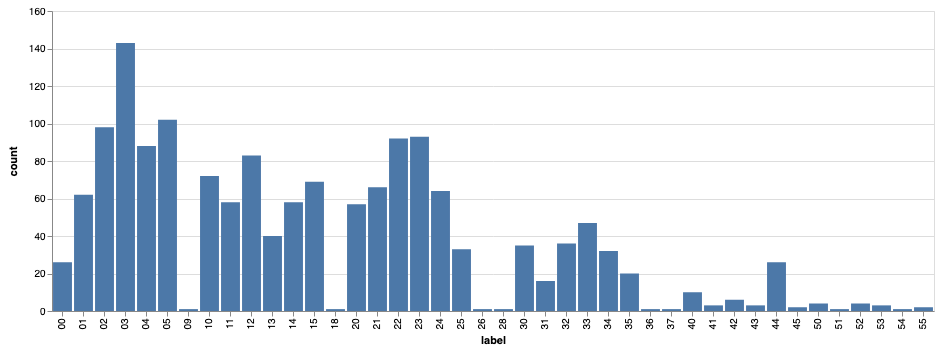

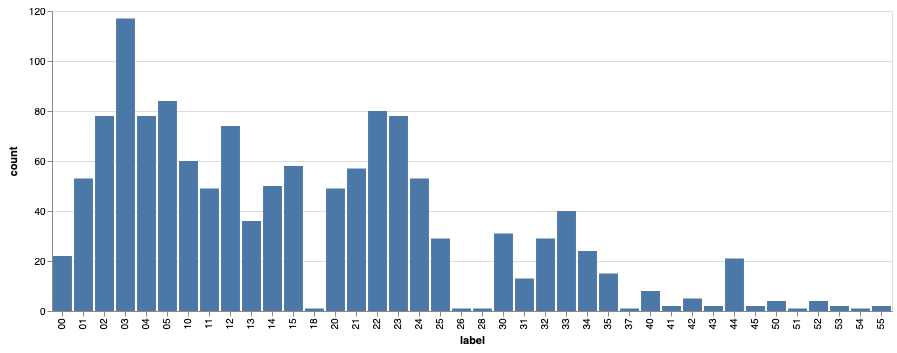

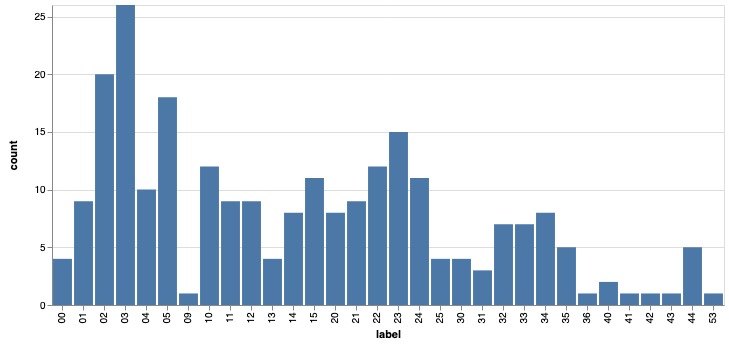

In [21]:
df_train = df[df.random_split=='train'] 
df_test = df[df.random_split=='test']


dataset.view_labels_distributions(label_position=1)
dataset.view_labels_distributions(df=df_train, label_position=1)
dataset.view_labels_distributions(df=df_test, label_position=1)

In [23]:
train_unique_labels = df_train.labels_1.unique()
test_unique_labels = df_test.labels_1.unique()

train_not_test = set(train_unique_labels) - set(test_unique_labels)
test_not_train = set(test_unique_labels) - set(train_unique_labels)

print(f'Labels in the train set not present int the test set: {train_not_test}')
print(f'Labels in the test set not present int the train set: {test_not_train}')

Labels in the train set not present int the test set: {'55', '26', '51', '52', '18', '54', '37', '45', '50', '28'}
Labels in the test set not present int the train set: {'09', '36'}


In [24]:
res = []
for img in dataset.images:
    res.append(img.resolution)
    
resoltuion_mean = np.mean(res, axis=0)

print(f'Mean image resoltuion: {resoltuion_mean}')

Mean image resoltuion: [164.23382447  75.96028187]


In [26]:
from nucleus.image import Image


def py_load_image(path):
    image = Image.load(path.numpy().decode("utf-8"))
    
    return (
        tf.cast(tf.image.resize(image.hwc, size=[160,  80]), tf.float32), 
        tf.one_hot(
            tf.cast(tf.convert_to_tensor(float(image.labels[1])), tf.int32),
            n_classes
        )
    )

def load_image(path):
    image = tf.py_function(
        py_load_image,
        [path],
        [tf.float32, tf.float32]
    )
    return image

In [27]:
from nucleus.utils import tf_get_shape


def scale_pixel_value(image: tf.Tensor, min_factor: float = 0.8, max_factor: float = 1.2):
    factors = tf.random.uniform(
            shape=tf_get_shape(image),
            minval=min_factor,
            maxval=max_factor,
        )
    image = image * factors
    return tf.clip_by_value(image, 0.0, 255.0)

In [28]:
def py_load_augment_image(path):
    image = Image.load(path.numpy().decode("utf-8"))
    
    hwc = image.hwc
    
    p = tf.random.uniform((1,), 0, 1)
    if p.numpy() >= 0.5:
        hwc = scale_pixel_value(hwc, 0.8, 1.2)
    
    p = tf.random.uniform((1,), 0, 1)
    if p.numpy() >= 0.5:
        p = tf.random.uniform((1,), 0, 1)
        if p.numpy() >= 0.5:
            hwc = tf.image.random_brightness(hwc, 0.5)

        p = tf.random.uniform((1,), 0, 1)
        if p.numpy() >= 0.5:
            hwc = tf.image.random_saturation(hwc, 0.8, 1.2)

        p = tf.random.uniform((1,), 0, 1)
        if p.numpy() >= 0.5:
            hwc = tf.image.random_hue(hwc, 0.02)

        p = tf.random.uniform((1,), 0, 1)
        if p.numpy() >= 0.5:
            hwc = tf.image.random_contrast(hwc, 0.8, 1.2)
    
    p = tf.random.uniform((1,), 0, 1)
    if p.numpy() >= 0.5:
        hwc = tf.image.central_crop(
        hwc,
        tf.minimum(tf.random.normal((1,), mean=0.9, stddev=0.03), 1)
    )
    
    hwc = tf.image.resize(hwc, size=[160,  80])
    
    return (
        tf.cast(hwc, tf.float32), 
        tf.one_hot(
            tf.cast(tf.convert_to_tensor(float(image.labels[1])), tf.int32),
            n_classes
        )
    )

def load_augment_image(path):
    image = tf.py_function(
        py_load_augment_image,
        [path],
        [tf.float32, tf.float32]
    )
    return image

In [29]:
train_files = [row['path'] for i, row in df_train.iterrows()]
test_files = [row['path'] for i, row in df_test.iterrows()] 

In [30]:
n_classes = 60
batch_size = 32
# buffer_size = 25

ds_train = tf.data.Dataset.from_tensor_slices(train_files)
ds_train = ds_train.map(load_augment_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.shuffle(buffer_size=len(train_files))
ds_train = ds_train.repeat(count=1)
ds_train = ds_train.batch(batch_size=batch_size)
ds_train = ds_train.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

ds_test = tf.data.Dataset.from_tensor_slices(test_files)
ds_test = ds_test.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.shuffle(buffer_size=len(train_files))
ds_test = ds_test.repeat(count=1)
ds_test = ds_test.batch(batch_size=batch_size)
ds_test = ds_test.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [31]:
import matplotlib.pyplot as plt

def show_image(hwc, labels):
    img = Image.from_hwc(
        hwc=tf.cast(hwc, tf.uint8), 
        labels=[tf.where(tf.equal(labels, 1))[0]]
    )

    img.view()
    plt.show()

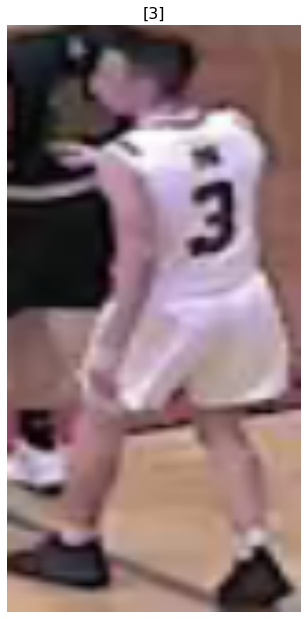

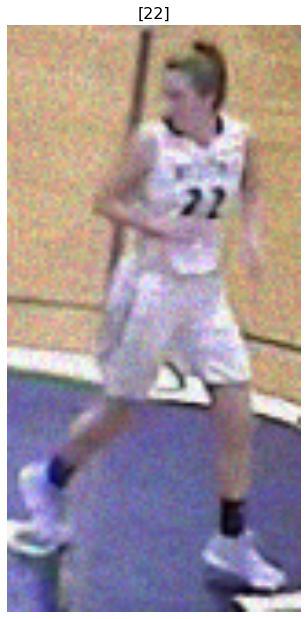

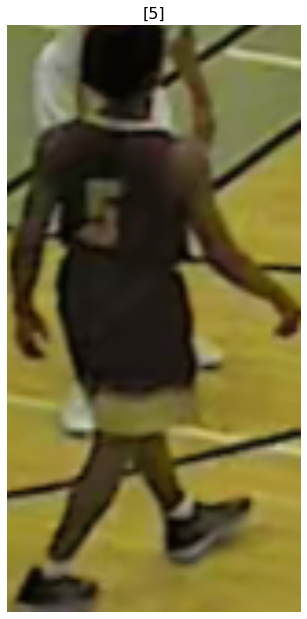

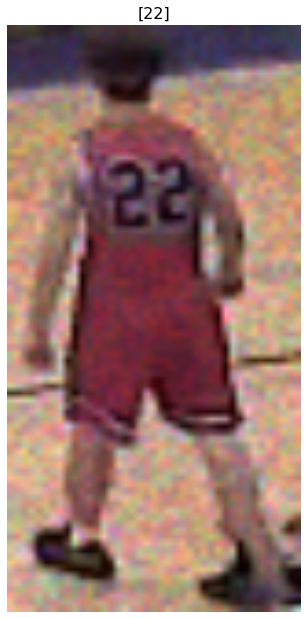

In [32]:
for image_batch, labels_batch in ds_train.take(1):
    for i in range(4):
        show_image(image_batch[i], labels_batch[i])
        

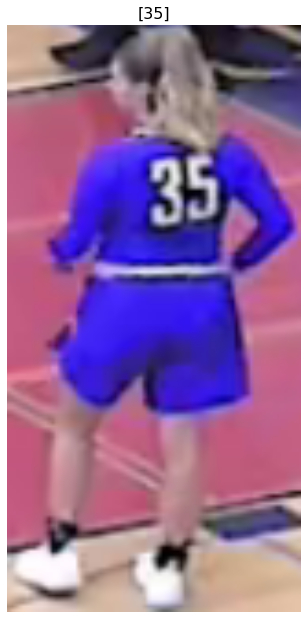

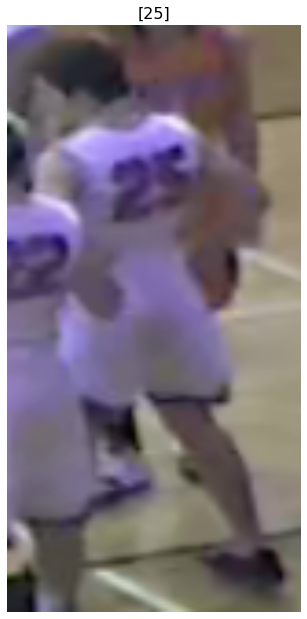

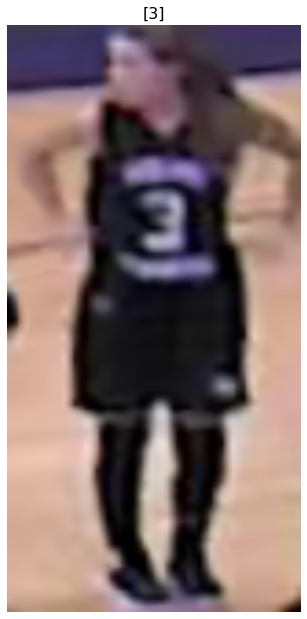

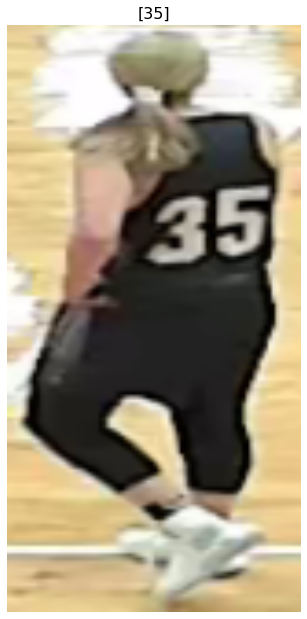

In [33]:
for image_batch, labels_batch in ds_test.take(1):
    for i in range(4):
        show_image(image_batch[i], labels_batch[i])

In [36]:
extractor = tf.keras.applications.MobileNet(weights='imagenet', input_shape=(None, None, 3), include_top=False)
extractor.trainable = False

# extractor.summary()

In [37]:
image_batch, label_batch = next(iter(ds_test))

feature_map_batch = extractor(image_batch)

print(f'Last feature map shape: {feature_map_batch.shape}')

Last feature map shape: (32, 5, 2, 1024)


In [38]:
model = tf.keras.Sequential([
    extractor,
    tf.keras.layers.Dropout(0.9),
    tf.keras.layers.GlobalAveragePooling2D(),
#     tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(n_classes),
    tf.keras.layers.Softmax()
], name='prototype')

In [39]:
logit_batch = model(image_batch).numpy()

print(f'Min logit:{logit_batch.min()}')
print(f'Max logit:{logit_batch.max()}')
print(f'Model prediction shape: {logit_batch.shape}')

Min logit:1.2096899126845528e-06
Max logit:0.6349009871482849
Model prediction shape: (32, 60)


In [40]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.01), 
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

In [41]:
log_dir = '/data2/joan/log_dir/proto_0'

# %tensorboard --host 0.0.0.0 --port 6001 --logdir log_dir

In [42]:
tensorboard_cbk = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=0,
    embeddings_freq=0,
    update_freq='epoch',
#     write_images=True
)

In [43]:
history = model.fit(
    ds_train, 
    epochs=1000,
    validation_data=ds_test,
    callbacks=[tensorboard_cbk]
)

PermissionDeniedError: /data2; Permission denied [Op:CreateSummaryFileWriter]

In [ ]:
ind = 0

c = model.predict(tf.cast(tf.image.resize(dataset.images[ind].hwc, size=[224, 224]), tf.float32)[None])

print(c)
dataset.images[ind].view()


(-c[0]).argsort()[:5]


h.model.evaluate(ds)